## RESEARCH QUESTIONS:
    * SHOW THE MIN, MAX AND MEAN PRICE OF COUNTRIES RECORDED IN THE DATASET, GROUP BY CURRENCY AND MARKET_TYPE.
    * SHOW THE MOST PERFORMING PRODUCE BY TOTAL PRICE PER USER DEFINED COUNTRY
    * SHOW THE DISTRIBUTION OF PRODUCE PER USER DEFINED COUNTRY
    * VISUALIZE PRODUCE BY PRICE PERFORMANCE PER USER DEFINED COUNTRY

In [1]:
import pandas as pd, numpy as np
import seaborn as sns, scipy as sp
import statistics as stats, matplotlib.pyplot as plt

print ('Imported necessary libraries.')

Imported necessary libraries.


# Transforming dataset

In [2]:
# Extracting dataset

path = 'datasets/africa_food_prices.csv'
df = pd.read_csv(path)
df.head()

,Unnamed: 0,country_id,country,state_id,state,market_id,market,produce_id,produce,currency_id,currency,pt_id,market_type,um_unit_id,quantity,month,year,price,mp_commoditysource
0,15427,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,4,2015,90.0,NaN
1,15428,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,5,2015,96.0,NaN
2,15429,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,6,2015,96.0,NaN
3,15430,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,7,2015,83.0,NaN
4,15431,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,8,2015,80.0,NaN


* # RENAMING COLUMN

In [3]:
df.rename(columns = {'Unnamed: 0':'id'}, inplace = True)
df.columns

Index(['id', 'country_id', 'country', 'state_id', 'state', 'market_id',
       'market', 'produce_id', 'produce', 'currency_id', 'currency', 'pt_id',
       'market_type', 'um_unit_id', 'quantity', 'month', 'year', 'price',
       'mp_commoditysource'],
      dtype='object')

* # DECONGESTING DATASET AS WE DO NOT NEED SOME COLUMNS IN OUR ANALYSIS

In [4]:
del df['country_id']
del df['state_id']
del df['market_id']
del df['produce_id']
del df['currency_id']
del df['pt_id']
del df['um_unit_id']
del df['mp_commoditysource']

print("Successful.")

Successful.


In [5]:
df.head()

,id,country,state,market,produce,currency,market_type,quantity,month,year,price
0,15427,Algeria,Alger,Algiers,Rice - Retail,DZD,Retail,KG,4,2015,90.0
1,15428,Algeria,Alger,Algiers,Rice - Retail,DZD,Retail,KG,5,2015,96.0
2,15429,Algeria,Alger,Algiers,Rice - Retail,DZD,Retail,KG,6,2015,96.0
3,15430,Algeria,Alger,Algiers,Rice - Retail,DZD,Retail,KG,7,2015,83.0
4,15431,Algeria,Alger,Algiers,Rice - Retail,DZD,Retail,KG,8,2015,80.0


* # CHECKING DATA TYPES

In [6]:
df.dtypes

id               int64
country         object
state           object
market          object
produce         object
currency        object
market_type     object
quantity        object
month            int64
year             int64
price          float64
dtype: object

* # WE DO NOT NEED SOME COLUMNS IN THEIR DEFAULT DATA TYPES.

In [7]:
df.id = df['id'].astype('str')
df.month = df['month'].astype('str')
df.year = df['year'].astype('str')

print('Transformed columns id, month and year to string format\nWe do not need to run any calculation on these columns.')

Transformed columns id, month and year to string format
We do not need to run any calculation on these columns.


* # CREATING DATE COLUMN

In [8]:
df['day'] = '1'

In [9]:
df['date'] = df['year']+ '-'+ df['month']+ '-'+df['day']

In [10]:
df['date']

0         2015-4-1
1         2015-5-1
2         2015-6-1
3         2015-7-1
4         2015-8-1
            ...   
956774    2021-6-1
956775    2021-6-1
956776    2021-6-1
956777    2021-6-1
956778    2021-6-1
Name: date, Length: 956779, dtype: object

In [11]:
df['date'] = df['date'].apply(pd.to_datetime)

# FURTHER EXLORATION

In [12]:
df.head()

,id,country,state,market,produce,currency,market_type,quantity,month,year,price,day,date
0,15427,Algeria,Alger,Algiers,Rice - Retail,DZD,Retail,KG,4,2015,90.0,1,2015-04-01
1,15428,Algeria,Alger,Algiers,Rice - Retail,DZD,Retail,KG,5,2015,96.0,1,2015-05-01
2,15429,Algeria,Alger,Algiers,Rice - Retail,DZD,Retail,KG,6,2015,96.0,1,2015-06-01
3,15430,Algeria,Alger,Algiers,Rice - Retail,DZD,Retail,KG,7,2015,83.0,1,2015-07-01
4,15431,Algeria,Alger,Algiers,Rice - Retail,DZD,Retail,KG,8,2015,80.0,1,2015-08-01


In [13]:
df.isnull().sum()

id                  0
country             0
state          126678
market              0
produce             0
currency            0
market_type         0
quantity            0
month               0
year                0
price               0
day                 0
date                0
dtype: int64

In [14]:
print(f'AMOUNT OF ROWS: {df.shape[0]}\nAMOUNT OF COLUMNS: {df.shape[1]}')

AMOUNT OF ROWS: 956779
AMOUNT OF COLUMNS: 13


# EXPLORING THE OPTIONS OF HANDLING NULL VALUES

* EXPLORING THE DATASET WITH NULL VALUES

1. The null values account for 13.24% of the dataset.
2. We only hve the null values on the state columns. Do we remove null values or fillna()?
3. We see that the null values has other data records intact, hence only the state column is null
4. Therefore, we check the country with the null values.

In [15]:
# Sending null rows as pandas dataframe to a variable
df_na = df[df.isna().any(axis =1)]
df_na.head()

,id,country,state,market,produce,currency,market_type,quantity,month,year,price,day,date
140847,398362,Chad,NaN,National Average,Rice (imported) - Retail,XAF,Retail,KG,11,2018,567.0,1,2018-11-01
140848,398363,Chad,NaN,National Average,Millet - Retail,XAF,Retail,KG,10,2018,191.0,1,2018-10-01
140849,398364,Chad,NaN,National Average,Millet - Retail,XAF,Retail,KG,11,2018,175.0,1,2018-11-01
140850,398365,Chad,NaN,National Average,Sorghum (red) - Retail,XAF,Retail,KG,10,2018,172.0,1,2018-10-01
140851,398366,Chad,NaN,National Average,Sorghum (red) - Retail,XAF,Retail,KG,11,2018,147.0,1,2018-11-01


In [16]:
print(f"We have {df_na['country'].nunique()} countries with null values")
for i in df_na['country'].unique():
    print (i)

We have 6 countries with null values
Chad
Egypt
Libya
Mozambique
South Sudan
Swaziland


* EXPLORING DATASET WITH NO NULL VALUES

In [17]:
df_no_null = df.copy()
df_no_null.dropna(inplace = True)

In [18]:
df_no_null.head()

,id,country,state,market,produce,currency,market_type,quantity,month,year,price,day,date
0,15427,Algeria,Alger,Algiers,Rice - Retail,DZD,Retail,KG,4,2015,90.0,1,2015-04-01
1,15428,Algeria,Alger,Algiers,Rice - Retail,DZD,Retail,KG,5,2015,96.0,1,2015-05-01
2,15429,Algeria,Alger,Algiers,Rice - Retail,DZD,Retail,KG,6,2015,96.0,1,2015-06-01
3,15430,Algeria,Alger,Algiers,Rice - Retail,DZD,Retail,KG,7,2015,83.0,1,2015-07-01
4,15431,Algeria,Alger,Algiers,Rice - Retail,DZD,Retail,KG,8,2015,80.0,1,2015-08-01


In [19]:
df_no_null['country'].unique()

array(['Algeria', 'Angola', 'Benin', 'Burundi', 'Cameroon', 'Cape Verde',
       'Central African Republic', 'Congo', 'Djibouti', 'Eritrea',
       'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau',
       'Kenya', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Senegal',
       'Sierra Leone', 'Somalia', 'South Africa', 'Sudan', 'Togo',
       'Uganda', 'Zambia', 'Zimbabwe'], dtype=object)

In [20]:
print(f"Amount or rows: {df_no_null.shape[0]}\nAmount of columns: {df_no_null.shape[1]}")

Amount or rows: 830101
Amount of columns: 13


In [21]:
df_na['country'].unique()

array(['Chad', 'Egypt', 'Libya', 'Mozambique', 'South Sudan', 'Swaziland'],
      dtype=object)

In [22]:
print(f"Amount of rows: {df_na.shape[0]}\nAmount of columns: {df_na.shape[1]}")

Amount of rows: 126678
Amount of columns: 13


CONCLUSION

* Removing null values will eliminate df_na['country'].unique() from the dataset.
* These will affect the originality of the dataset.
* We will therefore fill null state values with their country item.

In [23]:
df['state'].fillna(df['country'], inplace = True)
df.isna().sum()

id             0
country        0
state          0
market         0
produce        0
currency       0
market_type    0
quantity       0
month          0
year           0
price          0
day            0
date           0
dtype: int64

In [24]:
# Checking the amount of rows each countries are occupying in the dataset
df.country.value_counts()

country
Rwanda                      137746
Mali                         73843
Burundi                      60921
Gambia                       56971
Niger                        54974
Nigeria                      50285
Zambia                       42793
Mozambique                   42278
Libya                        41207
Benin                        39530
Senegal                      33563
Ghana                        25414
Ethiopia                     24627
Malawi                       22682
Cameroon                     22476
Guinea-Bissau                19796
Chad                         18896
Somalia                      18444
South Sudan                  17746
Central African Republic     12720
Liberia                      12302
Guinea                       11810
Sierra Leone                 11645
Zimbabwe                     10957
Mauritania                   10871
Sudan                         9890
Lesotho                       9364
Madagascar                    9193
Kenya       

# CHECKING THE MEAN, MAX AND MIN PRICE OF PRODUCE IN COUNTRIES RECORDED IN THE DATASET

Checking statistical summary of data items by:
* Country
* Currency
* Market type

In [25]:
df_grp = df.groupby(['country', 'currency','market_type'])

In [26]:
df_grp['price'].agg(['min', 'max', 'mean']).infer_objects()

min           max  \
country                  currency market_type                            
Algeria                  DZD      Retail          4.0000  1.200000e+03   
Angola                   AOA      Retail         35.2000  1.428095e+04   
Benin                    XOF      Retail          3.0000  2.184359e+04   
                                  Wholesale      71.2500  4.530000e+02   
Burundi                  BIF      Retail          1.0000  7.360400e+04   
                                  Wholesale     293.6700  1.528853e+03   
Cameroon                 XAF      Retail         65.7200  3.000000e+04   
                                  Wholesale     400.0000  1.600000e+05   
Cape Verde               CVE      Retail         27.4100  3.466700e+02   
Central African Republic XAF      Retail          5.0000  1.035341e+04   
Chad                     XAF      Retail         15.0000  2.148330e+05   
Congo                    XAF      Retail        118.0000  1.380000e+04   
Djibouti                 DJF      Retail         22.5000  4.000000e+02   
                                  Wholesale    3400.0000  1.450000e+04   
Egypt                    EGP      Retail          0.6600  1.504600e+02   
Eritrea                  ERN      Retail        900.0000  5.000000e+03   
Ethiopia                 ETB      Retail          0.7680  4.800000e+04   
                                  Wholesale      43.2500  6.000000e+03   
Gabon                    XAF      Retail        303.0000  1.519000e+03   
Gambia                   GMD      Retail          0.0000  1.000000e+03   
Ghana                    GHS      Retail          0.3200  8.195000e+01   
                                  Wholesale       0.8700  2.960780e+03   
Guinea                   GNF      Retail        500.0000  9.000000e+04   
Guinea-Bissau            XOF      Retail          1.0350  9.464000e+03   
Kenya                    KES      Retail          5.0000  7.000000e+02   
                                  Wholesale      10.4270  1.035000e+04   
Lesotho                  LSL      Retail          5.0000  1.262400e+02   
Liberia                  LRD      Retail          5.0000  1.100000e+04   
Libya                    LYD      Retail          0.0100  3.339167e+02   
Madagascar               MGA      Producer      220.0000  1.103000e+03   
                                  Retail        400.0000  9.800000e+03   
Malawi                   MWK      Retail          6.4467  1.032578e+04   
Mali                     XOF      Retail         20.0000  4.745000e+05   
Mauritania               MRO      Retail          8.5000  3.000000e+05   
Mozambique               MZN      Retail          1.0000  1.000000e+03   
                                  Wholesale       1.0100  4.800000e+01   
Namibia                  NAD      Retail          0.7000  6.856990e+01   
Niger                    XOF      Retail         32.0000  2.187500e+03   
                                  Wholesale    9000.0000  5.500000e+04   
Nigeria                  NGN      Retail          5.0000  1.700000e+04   
                                  Wholesale      64.8369  9.000000e+04   
Rwanda                   RWF      Retail         11.0000  3.323333e+05   
                                  Wholesale      63.3770  8.807460e+02   
Senegal                  XOF      Retail         90.0000  1.200000e+03   
Sierra Leone             SLL      Retail        100.0000  1.666670e+05   
Somalia                  SOS      Retail         97.0000  1.725000e+07   
South Africa             ZAR      Wholesale       0.5023  5.757200e+00   
South Sudan              SSP      Retail          1.8000  2.600000e+05   
                                  Wholesale     287.5000  6.500000e+04   
Sudan                    SDG      Retail          0.4975  8.000000e+02   
                                  Wholesale       3.0000  2.500000e+04   
Swaziland                SZL      Retail          3.8440  1.142714e+02   
                                  Wholesale      50.0000 

# CHECKING THE MOST PERFORMING PRODUCE PER COUNTRY BY TOTAL PRICE

AS A RESULT OF CURRENCY DIFFERENCE (that is, 50 Naira(NGN) is not the same as 50 Ugandan Shillings), WE WILL VIEW PRODUCE BY PRICE PERFORMANCE PER COUNTRY WITH PRICE SUM IN DESCENDING MANNER.

In [50]:
def show_performing_produce():
    try:
        print("Enter correct spelling of only one country here to see produce by price performance in that country")
        answer = input("Enter correct spelling here: ").capitalize()
        if answer in df.country.unique():
            print(f"\n\nProduce by price performance in {answer}")
            df_most_performing = df.groupby(['country','produce'])['price'].agg(['sum']).sort_values(by = 'sum', ascending = False)
            show_this = df_most_performing.loc[answer].sort_values(by= 'sum', ascending = False)
            return show_this
        else:
            print(f"Not Present in data. See list of recognized country below\n{df.country.unique()}")
            return
    except:
        print("ERROR!\nEnsure you entered the RIGHT SPELLING of ONLY ONE COUNTRY")

In [57]:
show_performing_produce()

Enter correct spelling of only one country here to see produce by price performance in that country


Enter correct spelling here:  egypt




Produce by price performance in Egypt


,sum
produce,
"Meat (beef, without bones) - Retail",8923.5700
Ghee (natural) - Retail,8801.7991
Meat (beef) - Retail,3566.9525
"Meat (chicken, frozen) - Retail",3069.1044
Oil (maize) - Retail,2453.3964
"Beans (fava, dry) - Retail",2139.7984
Garlic - Retail,2006.5091
Lentils - Retail,1949.9915
Cheese - Retail,1670.6300


# SHOW DISTRIBUTION OF PRODUCE IN USER DEFINED COUNTRY

In [53]:
def select_country():
    print('Enter full name of only one country below to see the top and bottom 10 distribution of produce in that country.')
    user_answer = input("Only enter one country here!!!: ").capitalize()
    if user_answer in df.country.unique():
        new_temp = df.groupby('country').get_group(user_answer).produce.value_counts()
        
        sns.set(palette= "Set3")
        fig, ax = plt.subplots(1,2, figsize = (12,5))
        plt.subplots_adjust(wspace = 0.5)
        ax[0].set_title(f"Top 10 products in {user_answer}")
        sns.barplot(x=new_temp.head(10), y = new_temp.head(10).index, ax = ax[0])
        ax[1].set_title(f"Bottom 10 products in {user_answer}")
        sns.barplot(x=new_temp.tail(10), y = new_temp.tail(10).index, ax = ax[1])
        return plt.show()
    else:
        print(f"Not Present in data. See list of recognzied country below\n{df.country.unique()}")
        return

Enter full name of only one country below to see the top and bottom 10 distribution of produce in that country.


Only enter one country here!!!:  niger


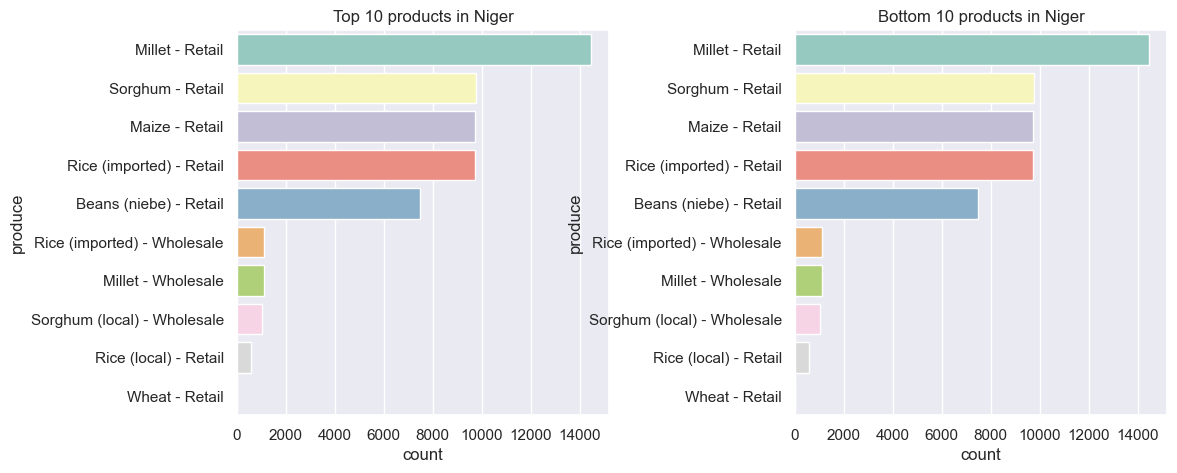

In [54]:
select_country()

In [55]:
def visualize_price_performance():
    print("This is to see the performance of product by price in selected country.")
    answer = input('Enter the correct spelling of only one country here!').capitalize()
    if answer in df.country.unique():  
        df_most_performing = df.groupby(['country','produce'])['price'].agg(['sum']).sort_values(by = 'sum', ascending = False)
        show_this = df_most_performing.loc[answer].sort_values(by= 'sum', ascending = False)
        colours = sns.color_palette('bright')[0:5]
        plt.figure(figsize = (12,8))
        plt.title(f"Distribution of top seven produce by price perfomance in {answer}.")
        plt.pie(show_this['sum'].head(7), labels = show_this.head(7).index, colors = colours, autopct = '%1.1f%%');
        return plt.show()
    else:
        print(f"Not Present in data. See list of recognzied country below\n{df.country.unique()}")

This is to see the performance of product by price in selected country.


Enter the correct spelling of only one country here! egypt


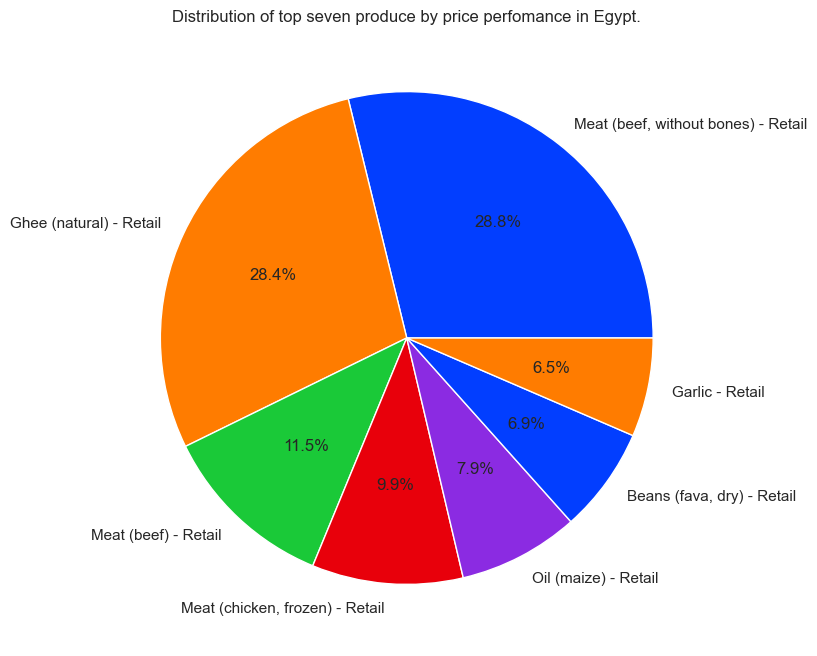

In [58]:
visualize_price_performance()

SIGNED:
    LAWAL KOLAWOLE OLURANTI